In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Q1

p(w1|x=240) = 0.13316806883249213


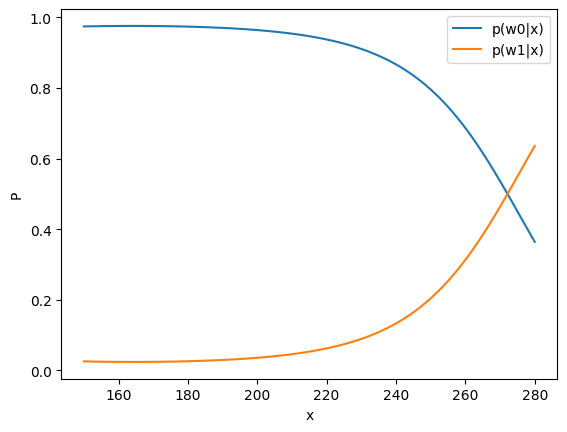

In [35]:
pw0, pw1 = 0.9, 0.1
df = pd.read_csv('s1.csv')
x = df['x'].to_numpy()
y = df['y'].to_numpy()
mean0, std0 = np.mean(x[y==0]), np.std(x[y==0])
mean1, std1 = np.mean(x[y==1]), np.std(x[y==1])
x_sample = np.linspace(150, 280, 100)
px_w0 = (1 / np.sqrt(2 * np.pi * std0**2)) * (np.exp(-0.5 * ((x_sample - mean0) / std0)**2))
px_w1 = (1 / np.sqrt(2 * np.pi * std1**2)) * (np.exp(-0.5 * ((x_sample - mean1) / std1)**2))
pw0_x = pw0 * px_w0 / (pw0 * px_w0 + pw1 * px_w1)
pw1_x = pw1 * px_w1 / (pw0 * px_w0 + pw1 * px_w1)
fig, ax = plt.subplots()
ax.plot(x_sample, pw0_x, label='p(w0|x)')
ax.plot(x_sample, pw1_x, label='p(w1|x)')
ax.set_xlabel('x')
ax.set_ylabel('P')
ax.legend()

pw1_x240 = np.interp(240, x_sample, pw1_x)
print(f'p(w1|x=240) = {pw1_x240}')

# Q2

In [9]:
def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

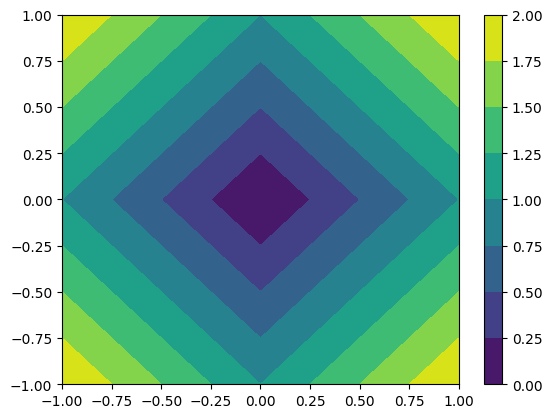

In [62]:
Xgrid, x1line, x2line = gen_sample_grid(200, 200, 1)
def get_l_n_norm(Xgrid, n):
    Xgrid = np.abs(Xgrid)
    return (Xgrid[:, 0]**n + Xgrid[:, 1]**n)**(1/n)
l_1 = get_l_n_norm(Xgrid, 1).reshape([200, 200])
l_inf = np.max(np.abs(Xgrid), axis=1).reshape([200, 200])
l_3_2 = get_l_n_norm(Xgrid, 1.5).reshape([200, 200])

plt.contourf(x1line, x2line, l_1)
plt.colorbar()


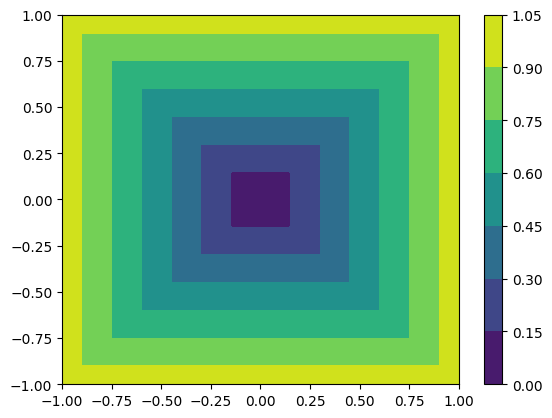

In [63]:
plt.contourf(x1line, x2line, l_inf)
plt.colorbar()

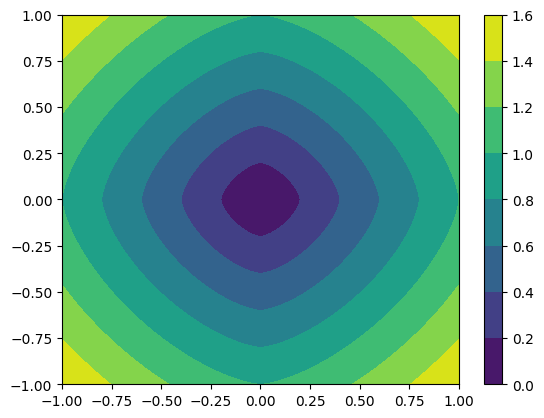

In [64]:
plt.contourf(x1line, x2line, l_3_2)
plt.colorbar()

# Q3

step change is at x=0.05


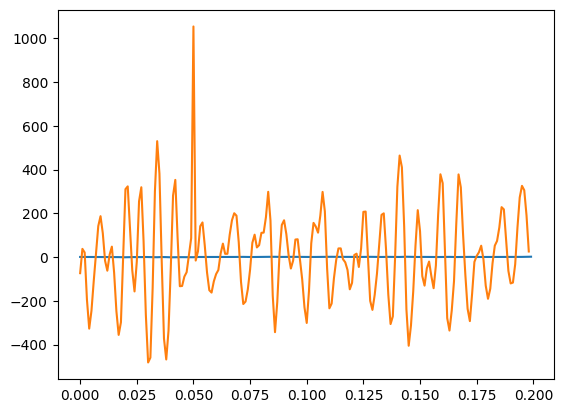

In [72]:
df = pd.read_csv('s2.csv')
x = df['x'].to_numpy()
y = df['y'].to_numpy()

dy = (y[1:] - y[:-1])/(x[1]-x[0])
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x[:-1], dy)

print(f'step change is at x={x[np.argmax(dy)]}')

3bi) If threshold is too low, other peaks (step changes) will be found.

3bii) If threshold is too high, the peak could be missed.

# Q4

a) Nonlinearity enables complexity within the network. In a network many nonlinear functions are combined together enabling arbitrarily complex functions to be captured. Conversely with linear functions, the output must always remain linear.

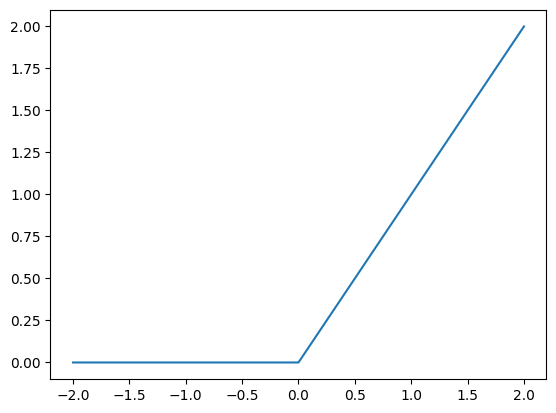

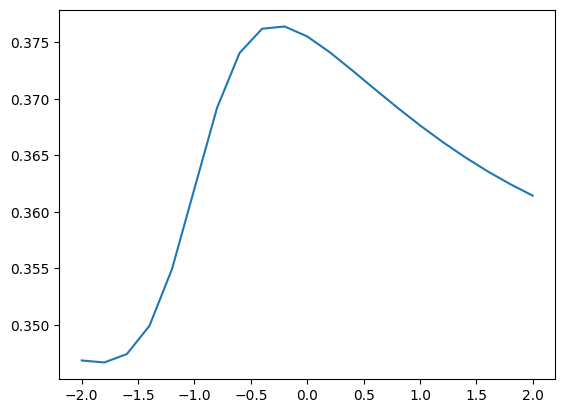

In [81]:
x = np.linspace(-2, 2, 21)
y_relu = [0 if xi<0 else xi for xi in x]
fig, ax = plt.subplots()
ax.plot(x, y_relu)

def sigmoid(y):
    return 1 / (1 + np.exp(-y))

y1 = sigmoid(4 * x + 4)
y2 = sigmoid(-0.8 * x - 0.1)
z1 = sigmoid(0.2 * y1 + 0.2 * y2 - 0.8)

fig, ax = plt.subplots()
ax.plot(x, z1)

# Q7

ai) Will capture the finer details in the training data and is accurate in space.

aii) Averages more samples, so gives a more accurate probability across the range.

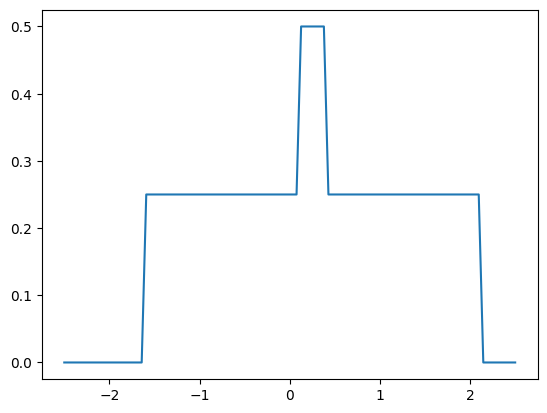

In [119]:
def parzen_f(centre, x, h):
    return int(np.abs(x - centre) < h/2)

x = np.linspace(-2.5, 2.5, 100)
h = 2
p1 = 1 / h * np.array([parzen_f(-0.6, xi, h) for xi in x])
p2 = 1 / h * np.array([parzen_f(1.1, xi, h) for xi in x])
p = (p1 + p2) / 2
fig, ax = plt.subplots()
ax.plot(x, p)

[]

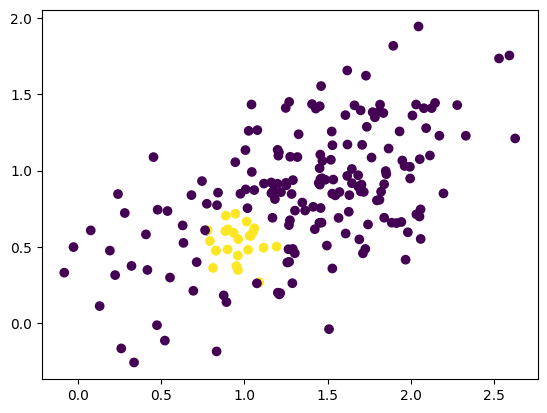

In [135]:
df = pd.read_csv('s3.csv')
x1 = df['x1'].to_numpy()
x2 = df['x2'].to_numpy()

x = np.array([x1, x2]).T
centre = np.array([1, 0.5])
h = 0.5

def parzen_f(xi, centre, h):
    u = (xi - centre) / h
    return int(np.linalg.norm(u) < 0.5)

p = (1 / h**2) * np.array([parzen_f(xi, centre, h) for xi in x])

fig, ax = plt.subplots()
ax.scatter(x1, x2, c=p)
ax.plot()

In [147]:
np.matmul(np.linalg.inv(np.array([[1, 5], [5, 9]])), np. array([6, 11]).T)

array([0.0625, 1.1875])